In [178]:
import numpy as np  # 引入numpy
import scipy as sp
import pylab as pl
from scipy.optimize import leastsq  # 引入最小二乘函数
from pymysql import *
import pandas as pd
#import color_generatior as cg
import pandas as pd
from sklearn import preprocessing
import time

n = 9  # 多项式次数

In [16]:
 
# 目标函数
def real_func(x):
    return (2*x)


In [11]:
 
# 多项式函数
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)
 


In [12]:
 
# 残差函数
def residuals_func(p, y, x):
    ret = fit_func(p, x) - y
    return ret
 


In [17]:
 
x = np.linspace(0, 1, 9)  # 随机选择9个点作为x
x_points = np.linspace(0, 1, 1000)  # 画图时需要的连续点
 
y0 = real_func(x)  # 目标函数
y1 = [np.random.normal(0, 0.1) + y for y in y0]  # 添加正太分布噪声后的函数
 
p_init = np.random.randn(n)  # 随机初始化多项式参数
 
plsq = leastsq(residuals_func, p_init, args=(y1, x))
 
print('Fitting Parameters: ', plsq[0] ) # 输出拟合参数
 


Fitting Parameters:  [-4.66654062e+03  1.87554785e+04 -3.06423939e+04  2.60906086e+04
 -1.23258584e+04  3.17172000e+03 -4.01668277e+02  2.05840335e+01
  7.71944007e-03]


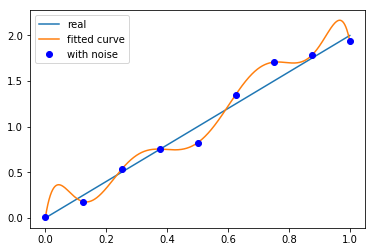

In [18]:
pl.plot(x_points, real_func(x_points), label='real')
pl.plot(x_points, fit_func(plsq[0], x_points), label='fitted curve')
pl.plot(x, y1, 'bo', label='with noise')
pl.legend()
pl.show()

In [19]:
regularization = 0.1  # 正则化系数lambda
 
# 残差函数
def residuals_func(p, y, x):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(regularization) * p)   # 将lambda^(1/2)p加在了返回的array的后面
    return ret

In [43]:
def emo_sql_read():
    conn = connect(host='121.40.208.170', port=3306, user='root', password='123456', database='Text_Project')
    # 获得cursor对象
    emo_cursor = conn.cursor()
    #emo_cursor.execute("SHOW COLUMNS FROM text_table")
    emo_cursor.execute("SELECT * FROM text_table t ;")
    #emo_cursor.execute("SELECT DISTINCT w.word, w.property,w.chinese_property, w.importance FROM word_table w ;")
    #emo_cursor.execute("SELECT DISTINCT  w.word, w.property,w.chinese_property, w.importance,w.emotion FROM word_table w join sentence_table s on w.sentence_id=s.sentence_id join(select *from text_table where text_title="+title+") t on s.text_id=t.text_id;")
    story_data = emo_cursor.fetchall()
    return story_data


In [40]:
columns = ['text_id', 'text_title', 'text_lead', 'readability', 'max', 
           'sixte', 'median', 'quartile', 'min', 'emtion_entropy', 
           'property_entropy', 'importance_entropy', 'strokes_entropy', 'strokes_16_pro', 
           'file']

['text_id', 'text_title', 'text_lead', 'readability', 'max', 'sixte', 'median', 'quartile', 'min', 'emtion_entropy', 'property_entropy', 'importance_entropy', 'strokes_entropy', 'strokes_16_pro', 'file']


In [69]:
story_data = emo_sql_read()
story_df = pd.DataFrame(list(story_data),columns = columns)

In [70]:
print(len(story_data))

7324


In [76]:
#story_df.head()
new_stodf = story_df[['readability', 'emtion_entropy','median','strokes_16_pro',
           'property_entropy', 'importance_entropy', 'strokes_entropy']].dropna(axis=0)
#new_stodf.head()
print(len(new_stodf))

7316


In [92]:
train = new_stodf[['readability', 'emtion_entropy','median','strokes_16_pro']].iloc[0:5000]
test = new_stodf[['readability', 'emtion_entropy','median','strokes_16_pro']].iloc[5000:7000]

In [93]:
train.values

array([[6.625e+00, 1.210e-01, 2.140e+02, 1.000e-02],
       [6.925e+00, 7.000e-02, 4.900e+01, 2.000e-03],
       [6.988e+00, 2.830e-01, 2.280e+02, 8.000e-03],
       ...,
       [6.411e+00, 3.500e-02, 1.565e+02, 5.000e-03],
       [5.862e+00, 8.700e-02, 3.150e+02, 4.000e-03],
       [7.098e+00, 9.700e-02, 3.640e+02, 2.000e-02]])

In [98]:
new_stodf.head()

,readability,emtion_entropy,median,strokes_16_pro,property_entropy,importance_entropy,strokes_entropy
0,6.625,0.121,214.0,0.010,0.462,0.129,0.462
1,6.925,0.070,49.0,0.002,0.481,0.215,0.481
2,6.988,0.283,228.0,0.008,0.403,0.096,0.403
3,8.158,0.185,113.0,0.001,0.415,0.136,0.415
4,6.778,0.059,42.5,0.010,0.516,0.086,0.516


In [106]:
for i in new_stodf[['readability', 'emtion_entropy','median','strokes_16_pro']].iterrows():
    print(i)

(0, readability         6.625
emtion_entropy      0.121
median            214.000
strokes_16_pro      0.010
Name: 0, dtype: float64)
(1, readability        6.925
emtion_entropy     0.070
median            49.000
strokes_16_pro     0.002
Name: 1, dtype: float64)
(2, readability         6.988
emtion_entropy      0.283
median            228.000
strokes_16_pro      0.008
Name: 2, dtype: float64)
(3, readability         8.158
emtion_entropy      0.185
median            113.000
strokes_16_pro      0.001
Name: 3, dtype: float64)
(4, readability        6.778
emtion_entropy     0.059
median            42.500
strokes_16_pro     0.010
Name: 4, dtype: float64)
(5, readability        6.849
emtion_entropy     0.035
median            29.500
strokes_16_pro     0.004
Name: 5, dtype: float64)
(6, readability        6.308
emtion_entropy     0.044
median            34.500
strokes_16_pro     0.004
Name: 6, dtype: float64)
(7, readability        6.656
emtion_entropy     0.131
median            97.000
stroke

Name: 390, dtype: float64)
(391, readability        8.169
emtion_entropy     0.021
median            34.000
strokes_16_pro     0.028
Name: 391, dtype: float64)
(392, readability        7.774
emtion_entropy     0.011
median            36.000
strokes_16_pro     0.001
Name: 392, dtype: float64)
(393, readability        8.684
emtion_entropy     0.022
median            26.500
strokes_16_pro     0.005
Name: 393, dtype: float64)
(394, readability        6.896
emtion_entropy     0.009
median            29.000
strokes_16_pro     0.006
Name: 394, dtype: float64)
(395, readability        7.814
emtion_entropy     0.010
median            30.500
strokes_16_pro     0.007
Name: 395, dtype: float64)
(396, readability        7.717
emtion_entropy     0.009
median            28.500
strokes_16_pro     0.004
Name: 396, dtype: float64)
(397, readability        7.339
emtion_entropy     0.027
median            38.500
strokes_16_pro     0.037
Name: 397, dtype: float64)
(398, readability        7.807
emtion_entr

Name: 790, dtype: float64)
(791, readability        7.691
emtion_entropy     0.016
median            26.500
strokes_16_pro     0.008
Name: 791, dtype: float64)
(792, readability        6.510
emtion_entropy     0.000
median            30.500
strokes_16_pro     0.002
Name: 792, dtype: float64)
(793, readability        6.090
emtion_entropy     0.025
median            33.500
strokes_16_pro     0.019
Name: 793, dtype: float64)
(794, readability        7.117
emtion_entropy     0.011
median            29.500
strokes_16_pro     0.020
Name: 794, dtype: float64)
(795, readability        7.184
emtion_entropy     0.022
median            22.500
strokes_16_pro     0.005
Name: 795, dtype: float64)
(796, readability        6.412
emtion_entropy     0.036
median            41.000
strokes_16_pro     0.006
Name: 796, dtype: float64)
(797, readability        7.027
emtion_entropy     0.013
median            31.500
strokes_16_pro     0.007
Name: 797, dtype: float64)
(798, readability        6.569
emtion_entr

Name: 1144, dtype: float64)
(1145, readability        7.434
emtion_entropy     0.013
median            40.500
strokes_16_pro     0.021
Name: 1145, dtype: float64)
(1146, readability        8.038
emtion_entropy     0.009
median            31.000
strokes_16_pro     0.023
Name: 1146, dtype: float64)
(1147, readability        7.193
emtion_entropy     0.026
median            36.500
strokes_16_pro     0.013
Name: 1147, dtype: float64)
(1148, readability        6.107
emtion_entropy     0.013
median            36.000
strokes_16_pro     0.019
Name: 1148, dtype: float64)
(1149, readability        7.190
emtion_entropy     0.024
median            31.000
strokes_16_pro     0.030
Name: 1149, dtype: float64)
(1150, readability        7.317
emtion_entropy     0.011
median            38.000
strokes_16_pro     0.004
Name: 1150, dtype: float64)
(1151, readability        8.073
emtion_entropy     0.048
median            44.500
strokes_16_pro     0.011
Name: 1151, dtype: float64)
(1152, readability        6

Name: 1458, dtype: float64)
(1459, readability        5.663
emtion_entropy     0.016
median            27.000
strokes_16_pro     0.019
Name: 1459, dtype: float64)
(1460, readability        6.207
emtion_entropy     0.002
median            11.000
strokes_16_pro     0.023
Name: 1460, dtype: float64)
(1461, readability        6.647
emtion_entropy     0.011
median            14.500
strokes_16_pro     0.000
Name: 1461, dtype: float64)
(1462, readability        5.319
emtion_entropy     0.006
median            22.000
strokes_16_pro     0.026
Name: 1462, dtype: float64)
(1463, readability        5.994
emtion_entropy     0.009
median            23.500
strokes_16_pro     0.020
Name: 1463, dtype: float64)
(1464, readability        5.322
emtion_entropy     0.009
median            19.000
strokes_16_pro     0.004
Name: 1464, dtype: float64)
(1465, readability        7.130
emtion_entropy     0.008
median            15.000
strokes_16_pro     0.010
Name: 1465, dtype: float64)
(1466, readability        6

Name: 1902, dtype: float64)
(1903, readability        6.929
emtion_entropy     0.020
median            56.000
strokes_16_pro     0.027
Name: 1903, dtype: float64)
(1904, readability        9.146
emtion_entropy     0.020
median            23.000
strokes_16_pro     0.002
Name: 1904, dtype: float64)
(1905, readability        6.479
emtion_entropy     0.025
median            44.000
strokes_16_pro     0.030
Name: 1905, dtype: float64)
(1906, readability        6.615
emtion_entropy     0.011
median            47.000
strokes_16_pro     0.009
Name: 1906, dtype: float64)
(1907, readability         6.048
emtion_entropy      0.037
median            112.500
strokes_16_pro      0.012
Name: 1907, dtype: float64)
(1908, readability        7.880
emtion_entropy     0.014
median            36.500
strokes_16_pro     0.005
Name: 1908, dtype: float64)
(1909, readability        6.489
emtion_entropy     0.012
median            26.500
strokes_16_pro     0.005
Name: 1909, dtype: float64)
(1910, readability     

Name: 2273, dtype: float64)
(2274, readability         9.144
emtion_entropy      0.095
median            133.500
strokes_16_pro      0.018
Name: 2274, dtype: float64)
(2275, readability         6.683
emtion_entropy      0.174
median            306.000
strokes_16_pro      0.004
Name: 2275, dtype: float64)
(2276, readability        8.272
emtion_entropy     0.027
median            49.500
strokes_16_pro     0.008
Name: 2276, dtype: float64)
(2277, readability        6.858
emtion_entropy     0.006
median            50.500
strokes_16_pro     0.005
Name: 2277, dtype: float64)
(2278, readability        7.709
emtion_entropy     0.039
median            93.000
strokes_16_pro     0.002
Name: 2278, dtype: float64)
(2279, readability         7.016
emtion_entropy      0.073
median            128.500
strokes_16_pro      0.011
Name: 2279, dtype: float64)
(2280, readability         6.951
emtion_entropy      0.044
median            114.500
strokes_16_pro      0.007
Name: 2280, dtype: float64)
(2281, read

Name: 2670, dtype: float64)
(2671, readability       7.117
emtion_entropy    0.005
median            9.000
strokes_16_pro    0.014
Name: 2671, dtype: float64)
(2672, readability       7.864
emtion_entropy    0.001
median            4.000
strokes_16_pro    0.000
Name: 2672, dtype: float64)
(2673, readability       5.798
emtion_entropy    0.000
median            4.500
strokes_16_pro    0.000
Name: 2673, dtype: float64)
(2674, readability       7.456
emtion_entropy    0.003
median            8.000
strokes_16_pro    0.020
Name: 2674, dtype: float64)
(2675, readability       7.031
emtion_entropy    0.002
median            5.500
strokes_16_pro    0.000
Name: 2675, dtype: float64)
(2676, readability        6.099
emtion_entropy     0.003
median            10.500
strokes_16_pro     0.000
Name: 2676, dtype: float64)
(2677, readability       7.783
emtion_entropy    0.004
median            5.000
strokes_16_pro    0.042
Name: 2677, dtype: float64)
(2678, readability        7.512
emtion_entropy     

Name: 3101, dtype: float64)
(3102, readability        6.638
emtion_entropy     0.008
median            18.000
strokes_16_pro     0.007
Name: 3102, dtype: float64)
(3103, readability         7.804
emtion_entropy      0.057
median            112.000
strokes_16_pro      0.003
Name: 3103, dtype: float64)
(3104, readability        4.610
emtion_entropy     0.003
median            45.500
strokes_16_pro     0.025
Name: 3104, dtype: float64)
(3105, readability         7.959
emtion_entropy      0.066
median            132.500
strokes_16_pro      0.008
Name: 3105, dtype: float64)
(3106, readability         6.399
emtion_entropy      0.027
median            105.000
strokes_16_pro      0.002
Name: 3106, dtype: float64)
(3107, readability         7.391
emtion_entropy      0.098
median            265.500
strokes_16_pro      0.006
Name: 3107, dtype: float64)
(3108, readability         7.520
emtion_entropy      0.084
median            179.000
strokes_16_pro      0.005
Name: 3108, dtype: float64)
(3109, 

(3483, readability        7.000
emtion_entropy     0.010
median            33.000
strokes_16_pro     0.015
Name: 3483, dtype: float64)
(3484, readability        6.362
emtion_entropy     0.024
median            80.500
strokes_16_pro     0.007
Name: 3484, dtype: float64)
(3485, readability        7.769
emtion_entropy     0.022
median            40.500
strokes_16_pro     0.001
Name: 3485, dtype: float64)
(3486, readability        7.069
emtion_entropy     0.018
median            37.500
strokes_16_pro     0.003
Name: 3486, dtype: float64)
(3487, readability         7.374
emtion_entropy      0.036
median            123.500
strokes_16_pro      0.010
Name: 3487, dtype: float64)
(3488, readability        9.253
emtion_entropy     0.017
median            44.500
strokes_16_pro     0.010
Name: 3488, dtype: float64)
(3489, readability        6.751
emtion_entropy     0.012
median            32.500
strokes_16_pro     0.009
Name: 3489, dtype: float64)
(3490, readability        5.810
emtion_entropy     

Name: 3903, dtype: float64)
(3904, readability         5.279
emtion_entropy      0.036
median            111.500
strokes_16_pro      0.013
Name: 3904, dtype: float64)
(3905, readability        7.310
emtion_entropy     0.004
median            18.000
strokes_16_pro     0.003
Name: 3905, dtype: float64)
(3906, readability        5.544
emtion_entropy     0.025
median            49.500
strokes_16_pro     0.003
Name: 3906, dtype: float64)
(3907, readability        6.238
emtion_entropy     0.003
median            59.000
strokes_16_pro     0.009
Name: 3907, dtype: float64)
(3908, readability         7.478
emtion_entropy      0.107
median            342.000
strokes_16_pro      0.007
Name: 3908, dtype: float64)
(3909, readability        6.934
emtion_entropy     0.027
median            70.500
strokes_16_pro     0.004
Name: 3909, dtype: float64)
(3910, readability        5.958
emtion_entropy     0.010
median            32.500
strokes_16_pro     0.002
Name: 3910, dtype: float64)
(3911, readability 

Name: 4332, dtype: float64)
(4333, readability        5.854
emtion_entropy     0.026
median            76.000
strokes_16_pro     0.047
Name: 4333, dtype: float64)
(4334, readability        5.659
emtion_entropy     0.027
median            73.500
strokes_16_pro     0.020
Name: 4334, dtype: float64)
(4335, readability        6.008
emtion_entropy     0.024
median            42.000
strokes_16_pro     0.003
Name: 4335, dtype: float64)
(4336, readability         8.431
emtion_entropy      0.050
median            124.500
strokes_16_pro      0.008
Name: 4336, dtype: float64)
(4337, readability         6.201
emtion_entropy      0.064
median            144.500
strokes_16_pro      0.024
Name: 4337, dtype: float64)
(4338, readability        7.577
emtion_entropy     0.007
median            20.000
strokes_16_pro     0.014
Name: 4338, dtype: float64)
(4339, readability        7.814
emtion_entropy     0.061
median            59.500
strokes_16_pro     0.007
Name: 4339, dtype: float64)
(4340, readability 

Name: 4763, dtype: float64)
(4764, readability         6.611
emtion_entropy      0.043
median            114.000
strokes_16_pro      0.009
Name: 4764, dtype: float64)
(4765, readability         5.398
emtion_entropy      0.032
median            119.000
strokes_16_pro      0.008
Name: 4765, dtype: float64)
(4766, readability        6.787
emtion_entropy     0.023
median            37.500
strokes_16_pro     0.011
Name: 4766, dtype: float64)
(4767, readability         7.162
emtion_entropy      0.330
median            806.000
strokes_16_pro      0.009
Name: 4767, dtype: float64)
(4768, readability         5.855
emtion_entropy      0.038
median            126.000
strokes_16_pro      0.003
Name: 4768, dtype: float64)
(4769, readability         7.233
emtion_entropy      0.027
median            114.000
strokes_16_pro      0.007
Name: 4769, dtype: float64)
(4770, readability        6.603
emtion_entropy     0.026
median            94.000
strokes_16_pro     0.008
Name: 4770, dtype: float64)
(4771, 

Name: 5158, dtype: float64)
(5159, readability         5.992
emtion_entropy      0.134
median            443.000
strokes_16_pro      0.007
Name: 5159, dtype: float64)
(5160, readability        6.981
emtion_entropy     0.021
median            24.000
strokes_16_pro     0.013
Name: 5160, dtype: float64)
(5161, readability        6.686
emtion_entropy     0.034
median            52.500
strokes_16_pro     0.008
Name: 5161, dtype: float64)
(5162, readability        7.266
emtion_entropy     0.020
median            58.000
strokes_16_pro     0.008
Name: 5162, dtype: float64)
(5163, readability        8.282
emtion_entropy     0.016
median            24.500
strokes_16_pro     0.002
Name: 5163, dtype: float64)
(5164, readability        7.819
emtion_entropy     0.019
median            31.000
strokes_16_pro     0.002
Name: 5164, dtype: float64)
(5165, readability        7.613
emtion_entropy     0.029
median            57.500
strokes_16_pro     0.040
Name: 5165, dtype: float64)
(5166, readability     

Name: 5590, dtype: float64)
(5591, readability       5.967
emtion_entropy    0.003
median            8.000
strokes_16_pro    0.023
Name: 5591, dtype: float64)
(5592, readability       7.395
emtion_entropy    0.004
median            9.500
strokes_16_pro    0.082
Name: 5592, dtype: float64)
(5593, readability        5.891
emtion_entropy     0.018
median            17.500
strokes_16_pro     0.011
Name: 5593, dtype: float64)
(5594, readability        7.422
emtion_entropy     0.012
median            19.500
strokes_16_pro     0.014
Name: 5594, dtype: float64)
(5595, readability       7.105
emtion_entropy    0.007
median            9.500
strokes_16_pro    0.007
Name: 5595, dtype: float64)
(5596, readability        6.821
emtion_entropy     0.011
median            18.000
strokes_16_pro     0.022
Name: 5596, dtype: float64)
(5597, readability       5.874
emtion_entropy    0.003
median            8.000
strokes_16_pro    0.009
Name: 5597, dtype: float64)
(5598, readability       6.557
emtion_entro

Name: 5899, dtype: float64)
(5900, readability        6.689
emtion_entropy     0.033
median            77.000
strokes_16_pro     0.024
Name: 5900, dtype: float64)
(5901, readability        7.891
emtion_entropy     0.020
median            64.500
strokes_16_pro     0.019
Name: 5901, dtype: float64)
(5902, readability        7.838
emtion_entropy     0.025
median            77.500
strokes_16_pro     0.019
Name: 5902, dtype: float64)
(5903, readability        8.060
emtion_entropy     0.007
median            25.000
strokes_16_pro     0.031
Name: 5903, dtype: float64)
(5904, readability        8.174
emtion_entropy     0.000
median            11.000
strokes_16_pro     0.010
Name: 5904, dtype: float64)
(5905, readability        6.904
emtion_entropy     0.003
median            12.500
strokes_16_pro     0.005
Name: 5905, dtype: float64)
(5906, readability        5.764
emtion_entropy     0.010
median            48.000
strokes_16_pro     0.000
Name: 5906, dtype: float64)
(5907, readability        6

Name: 6275, dtype: float64)
(6276, readability        6.423
emtion_entropy     0.008
median            33.000
strokes_16_pro     0.008
Name: 6276, dtype: float64)
(6277, readability        5.485
emtion_entropy     0.018
median            45.000
strokes_16_pro     0.037
Name: 6277, dtype: float64)
(6278, readability        4.600
emtion_entropy     0.007
median            38.500
strokes_16_pro     0.070
Name: 6278, dtype: float64)
(6279, readability        4.826
emtion_entropy     0.015
median            40.500
strokes_16_pro     0.008
Name: 6279, dtype: float64)
(6280, readability        6.729
emtion_entropy     0.025
median            45.500
strokes_16_pro     0.027
Name: 6280, dtype: float64)
(6281, readability         5.622
emtion_entropy      0.022
median            102.500
strokes_16_pro      0.007
Name: 6281, dtype: float64)
(6282, readability        5.893
emtion_entropy     0.014
median            51.000
strokes_16_pro     0.025
Name: 6282, dtype: float64)
(6283, readability     

Name: 6697, dtype: float64)
(6698, readability        6.160
emtion_entropy     0.008
median            23.000
strokes_16_pro     0.003
Name: 6698, dtype: float64)
(6699, readability         6.946
emtion_entropy      0.098
median            223.000
strokes_16_pro      0.004
Name: 6699, dtype: float64)
(6700, readability        7.207
emtion_entropy     0.010
median            19.000
strokes_16_pro     0.037
Name: 6700, dtype: float64)
(6701, readability        5.473
emtion_entropy     0.015
median            28.000
strokes_16_pro     0.003
Name: 6701, dtype: float64)
(6702, readability        5.945
emtion_entropy     0.006
median            30.500
strokes_16_pro     0.009
Name: 6702, dtype: float64)
(6703, readability        6.883
emtion_entropy     0.036
median            67.500
strokes_16_pro     0.007
Name: 6703, dtype: float64)
(6704, readability        4.739
emtion_entropy     0.010
median            36.000
strokes_16_pro     0.006
Name: 6704, dtype: float64)
(6705, readability     

Name: 7098, dtype: float64)
(7099, readability         5.129
emtion_entropy      0.060
median            240.500
strokes_16_pro      0.007
Name: 7099, dtype: float64)
(7100, readability         4.535
emtion_entropy      0.027
median            121.500
strokes_16_pro      0.005
Name: 7100, dtype: float64)
(7101, readability         5.285
emtion_entropy      0.052
median            160.500
strokes_16_pro      0.010
Name: 7101, dtype: float64)
(7102, readability         4.568
emtion_entropy      0.054
median            243.500
strokes_16_pro      0.016
Name: 7102, dtype: float64)
(7103, readability         4.716
emtion_entropy      0.057
median            201.500
strokes_16_pro      0.013
Name: 7103, dtype: float64)
(7104, readability         4.878
emtion_entropy      0.087
median            348.500
strokes_16_pro      0.010
Name: 7104, dtype: float64)
(7105, readability        5.139
emtion_entropy     0.061
median            99.500
strokes_16_pro     0.005
Name: 7105, dtype: float64)
(71

In [107]:
i

(7323, readability         6.333
 emtion_entropy      0.077
 median            160.000
 strokes_16_pro      0.010
 Name: 7323, dtype: float64)

In [62]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})

In [201]:
sns.pairplot(new_stodf)

In [ ]:
train = story_data

In [161]:
import numpy as np
 
def loadDataSet(fileName):
    dataMat=[]
    labelMat=[]
    fr=open(fileName)
    for line in fr.readlines():
        curLine=line.strip().split(',')
        dataMat.append(list(map(float,curLine[:-1])))
        labelMat.append(float(curLine[-1]))
    
    return dataMat,labelMat
 
def standRegress(xArr,yArr):
    xMat=np.mat(xArr)
    yMat=np.mat(yArr).T
    xTx=xMat.T*xMat
    if np.linalg.det(xTx)==0.0:
        return 'nothing'
    ws=xTx.I*(xMat.T*yMat)
    return ws


                

In [179]:
#MaxMinNormalization(x,Max,Min)
min_max_scaler = preprocessing.MinMaxScaler()

#frame=data.apply(MaxMinNormalization x:x*2)
#new_read = map(MaxMinNormalization, list(new_stodf['readability']))

In [190]:
test = np.array(new_stodf[['readability']])
X_test_minmax = min_max_scaler.fit_transform(test)

In [189]:
X_train_minmax

array([[0.3425062 ],
       [0.37793788],
       [0.38537853],
       ...,
       [0.25274595],
       [0.27577654],
       [0.30801937]])

In [191]:
new_stodf['new_readability'] = X_test_minmax

In [198]:
data = new_stodf[['emtion_entropy','median','strokes_16_pro',
           'property_entropy',  'strokes_entropy','importance_entropy']].dropna(axis=1).iloc[1:]
data.to_csv('prediction_train.txt',index=False)

In [199]:

xArr,yArr=loadDataSet('prediction_train.txt')
ws=standRegress(xArr,yArr)
 
 

In [200]:
ws

matrix([[-2.62991533e-01],
        [ 1.04209559e-04],
        [ 8.50443095e-01],
        [ 2.38360759e-02],
        [ 3.18023418e-01]])